In [84]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_qubits = QuantumRegister(2, 'd')
ancilla_qubits = QuantumRegister(2, 'a')
syndrome_cregs = ClassicalRegister(2, 'syndrome')

# SC four-cycle

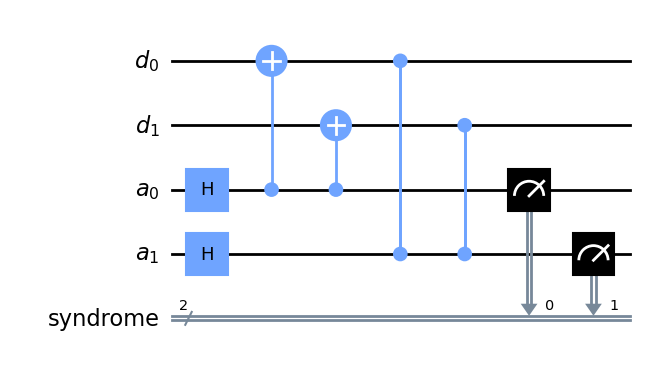

In [3]:
qc = QuantumCircuit(data_qubits, ancilla_qubits, syndrome_cregs)
qc.h(ancilla_qubits)
qc.cx(ancilla_qubits[0], data_qubits[0])
qc.cx(ancilla_qubits[0], data_qubits[1])
qc.cz(ancilla_qubits[1], data_qubits[0])
qc.cz(ancilla_qubits[1], data_qubits[1])

qc.measure(ancilla_qubits, syndrome_cregs)

qc.draw('mpl')

# 2d trail

In [71]:
surface_code_sq = 5

In [72]:
if surface_code_sq%2 ==0:
    raise Exception('surface_code_sq should be odd')

In [73]:
# n,k,d
n = (surface_code_sq**2)//2 + 1

In [74]:
data_qubits = QuantumRegister(n, 'd')
ancilla_qubits = QuantumRegister(n-1, 'a')
syndrome_cregs = ClassicalRegister(n-1, 'syndrome')

In [75]:
arr = []

for i in range(n):
    arr.append(data_qubits[i])
    if i < n-1:
        arr.append(ancilla_qubits[i])

In [76]:
arr = np.array(arr)

In [77]:
len(arr)

25

In [78]:
arr = arr.reshape(surface_code_sq, surface_code_sq)

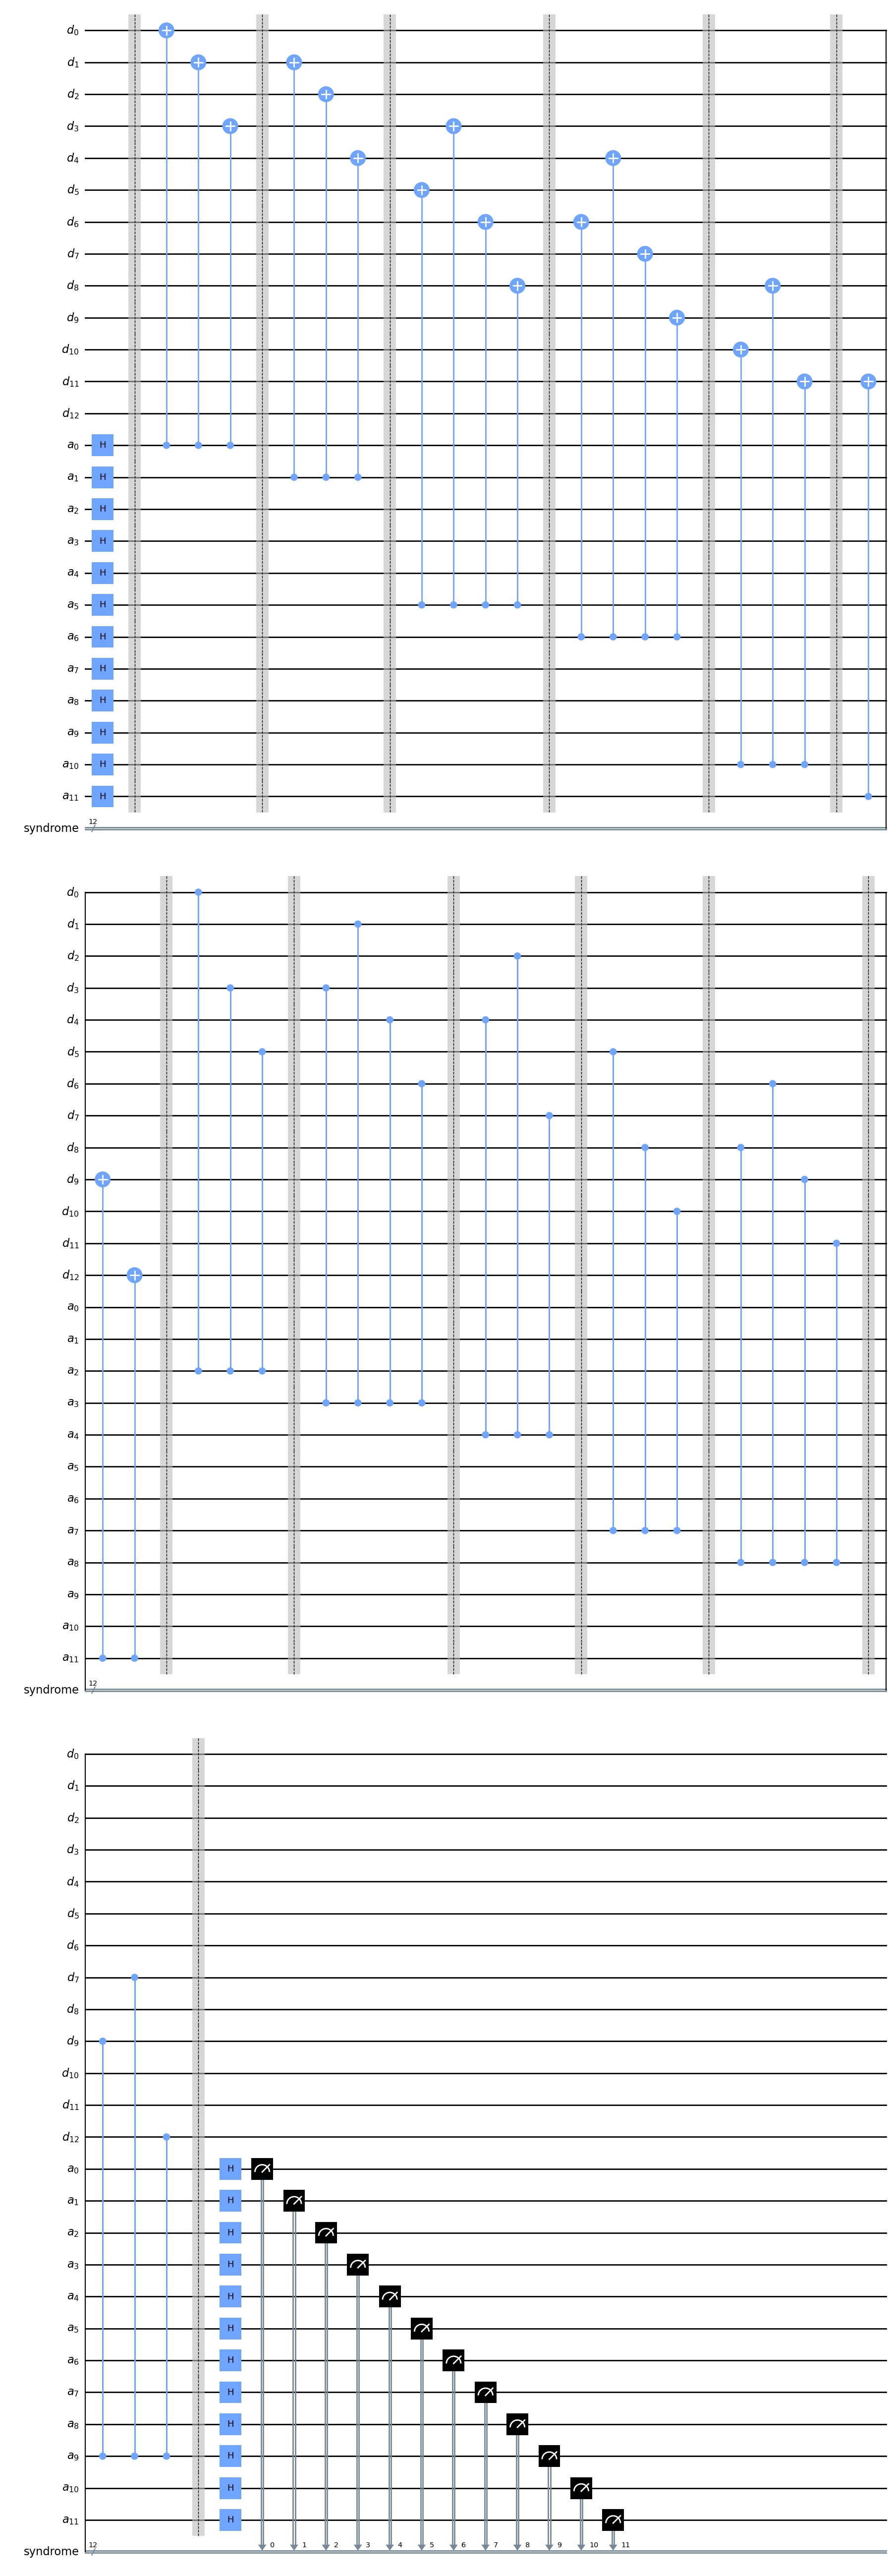

In [88]:
qc = QuantumCircuit(data_qubits, ancilla_qubits, syndrome_cregs)
qc.h(ancilla_qubits)
qc.barrier()

for row_index in range(0, surface_code_sq, 2):
    for col_index in range(1, surface_code_sq, 2):
        x_ancilla_qubit = arr[row_index, col_index]
        for i, j in ((0, -1), (-1, 0), (0, 1), (1, 0)):
            data_qubit_row_index = row_index + i
            data_qubit_col_index = col_index + j
            if data_qubit_row_index > -1 and data_qubit_col_index > -1 and data_qubit_row_index < surface_code_sq and data_qubit_col_index < surface_code_sq:
                data_qubit = arr[data_qubit_row_index, data_qubit_col_index]
                qc.cx(x_ancilla_qubit, data_qubit)
        qc.barrier()
            

for row_index in range(1, surface_code_sq, 2):
    for col_index in range(0, surface_code_sq, 2):
        z_ancilla_qubit = arr[row_index, col_index]
        for i, j in ((0, -1), (-1, 0), (0, 1), (1, 0)):
            data_qubit_row_index = row_index + i
            data_qubit_col_index = col_index + j
            if data_qubit_row_index > -1 and data_qubit_col_index > -1 and data_qubit_row_index < surface_code_sq and data_qubit_col_index < surface_code_sq:
                data_qubit = arr[data_qubit_row_index, data_qubit_col_index]
                qc.cz(z_ancilla_qubit, data_qubit)
        qc.barrier()


# qc.barrier()
qc.h(ancilla_qubits)
qc.measure(ancilla_qubits, syndrome_cregs)

qc.draw('mpl')

In [80]:
for i in range(0, n, 2):
    print(i)

0
2
4
6
8
10
12


In [16]:
arr[-1, 0]

Qubit(QuantumRegister(13, 'd'), 10)